In [3]:
import pandas as pd
import psycopg2 as pg

In [5]:
participant = pd.read_csv('C:/Users/DarkK/Documents/data_sci/ds004515/participants.tsv' , sep='\t')

,participant_id,Original_ID,sex,age,GROUP,BDI,AUDIT,EDUCATION
0,sub-001,10600,F,43,CTL,14,1,16
1,sub-002,10601,F,50,CTL,2,2,16
2,sub-003,10602,F,22,CTL,2,1,18
3,sub-004,10603,F,18,CTL,0,1,13
4,sub-005,10604,M,31,CTL,1,1,14
5,sub-006,10605,F,24,CTL,8,3,19
6,sub-007,10606,M,44,ALC,5,7,16
7,sub-008,10607,M,38,ALC,42,27,13
8,sub-009,10608,M,32,ALC,1,11,16
9,sub-010,10609,F,54,ALC,17,9,12


In [4]:
connect = pg.connect(
    host='localhost',
    database='EEG_database',
    user='postgres',
    password='bank2739',
    port=5432
)

cursor = connect.cursor()

In [6]:
participant_id = participant['participant_id']
participant_group = participant['GROUP']


participant_id

participant_group

0     CTL
1     CTL
2     CTL
3     CTL
4     CTL
5     CTL
6     ALC
7     ALC
8     ALC
9     ALC
10    ALC
11    ALC
12    ALC
13    ALC
14    ALC
15    ALC
16    ALC
17    ALC
18    CTL
19    CTL
20    ALC
21    ALC
22    ALC
23    ALC
24    ALC
25    ALC
26    ALC
27    ALC
28    ALC
29    ALC
30    ALC
31    ALC
32    ALC
33    ALC
34    ALC
35    CTL
36    CTL
37    ALC
38    CTL
39    CTL
40    CTL
41    CTL
42    CTL
43    CTL
44    CTL
45    CTL
46    CTL
47    CTL
48    CTL
49    CTL
50    CTL
51    CTL
52    CTL
53    CTL
Name: GROUP, dtype: object

In [8]:
import mne

def insert_data_eeg(participant_id):
    filePath = rf'C:/Users/DarkK/Documents/data_sci/ds004515/{participant_id}/eeg/{participant_id}_task-ProbabilisticSelection_eeg.set'
    raw = mne.io.read_raw_eeglab(filePath)
    eegData = raw.get_data()
    ch_names = raw.ch_names

    for i in range(len(ch_names)):
        ch_name = ch_names[i]
        ch_data = eegData[i]
        name = ch_name.lower()
        data = sum(ch_data) / len(ch_data)

        if len(name.split(' ')) >= 2:
            name = '_'.join(name.split(' '))
        else:
            name = name

        sqlinsert = f"INSERT INTO eeg_records (participant_id, {name}) VALUES ('{participant_id}', {data})"
        sqlupdate = f"UPDATE eeg_records SET {name} = {data} WHERE participant_id = '{participant_id}'"

        if i == 0:
            cursor.execute(sqlinsert)
            connect.commit()
        else:
            cursor.execute(sqlupdate)
            connect.commit()
    



In [9]:
for i in range(len(participant_id)):
    try:
        insert_data_eeg(participant_id[i])
    except Exception as e:
        print(f"Error inserting data for participant {participant_id[i]}: {e}")
        connect.rollback()

Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-001\eeg\sub-001_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-002\eeg\sub-002_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-003\eeg\sub-003_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-004\eeg\sub-004_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Error inserting data for participant sub-004: column "ft9" of relation "eeg_records" does not exist
LINE 1: UPDATE eeg_records SET ft9 = -0.010146454528895253 WHERE par...
                               ^

Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-005\eeg\sub-005_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Error inserting data for participant sub-005: column "ft9" of relation "eeg_records" does not exist
LINE 1: UPDATE eeg_records SET ft9 = -0.024506568563852582 WHERE par...
                               ^

Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-006\eeg\sub-006_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-007\eeg\sub-007_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-008\eeg\sub-008_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-009\eeg\sub-009_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-010\eeg\sub-010_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-011\eeg\sub-011_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-012\eeg\sub-012_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-013\eeg\sub-013_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-014\eeg\sub-014_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-015\eeg\sub-015_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-016\eeg\sub-016_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-017\eeg\sub-017_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-018\eeg\sub-018_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-019\eeg\sub-019_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-020\eeg\sub-020_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-021\eeg\sub-021_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Error inserting data for participant sub-021: column "ft9" of relation "eeg_records" does not exist
LINE 1: UPDATE eeg_records SET ft9 = -0.0016845392495547186 WHERE pa...
                               ^

Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-022\eeg\sub-022_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Error inserting data for participant sub-022: column "ft9" of relation "eeg_records" does not exist
LINE 1: UPDATE eeg_records SET ft9 = -0.011076317632348013 WHERE par...
                               ^

Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-023\eeg\sub-023_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Error inserting data for participant sub-023: column "ft9" of relation "eeg_records" does not exist
LINE 1: UPDATE eeg_records SET ft9 = -0.016077003355977913 WHERE par...
                               ^

Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-024\eeg\sub-024_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Error inserting data for participant sub-024: column "ft9" of relation "eeg_records" does not exist
LINE 1: UPDATE eeg_records SET ft9 = 0.016795412030821556 WHERE part...
                               ^

Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-025\eeg\sub-025_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-026\eeg\sub-026_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-027\eeg\sub-027_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-028\eeg\sub-028_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-029\eeg\sub-029_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-030\eeg\sub-030_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-031\eeg\sub-031_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-032\eeg\sub-032_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-033\eeg\sub-033_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-034\eeg\sub-034_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-035\eeg\sub-035_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-036\eeg\sub-036_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-037\eeg\sub-037_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-038\eeg\sub-038_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-039\eeg\sub-039_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-040\eeg\sub-040_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-041\eeg\sub-041_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-042\eeg\sub-042_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-043\eeg\sub-043_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-044\eeg\sub-044_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-045\eeg\sub-045_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-046\eeg\sub-046_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-047\eeg\sub-047_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-048\eeg\sub-048_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-049\eeg\sub-049_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-050\eeg\sub-050_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-051\eeg\sub-051_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-052\eeg\sub-052_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-053\eeg\sub-053_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


Reading C:\Users\DarkK\Documents\data_sci\ds004515\sub-054\eeg\sub-054_task-ProbabilisticSelection_eeg.fdt


C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\2009263781.py:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(filePath)


In [11]:
rawDataSQl = pd.read_sql_query("SELECT * FROM eeg_records", connect)

rawDataSQl

C:\Users\DarkK\AppData\Local\Temp\ipykernel_21812\1044120166.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  rawDataSQl = pd.read_sql_query("SELECT * FROM eeg_records", connect)


,participant_id,fp1,fz,f3,f7,below_eye,fc5,fc1,c3,t7,...,c2,fc4,ft8,f6,f2,af4,af8,empty,ekg,audiooutput
0,sub-009,-0.018977,-0.012562,-0.003156,-0.029378,-0.005898,-0.010873,-0.000858,-0.017093,-0.027377,...,0.004662,-0.019951,-0.036140,-0.025300,-0.012703,-0.025295,-0.022501,0.012303,0.050009,0.002838
1,sub-006,-0.005962,0.014713,0.005335,0.022881,0.012168,0.008540,0.000893,0.004453,-0.007154,...,0.013867,-0.003909,0.000481,-0.009388,-0.007416,0.000051,-0.006602,0.012423,-0.186586,0.002769
2,sub-003,-0.026259,-0.000343,-0.000536,-0.006117,-0.016435,-0.020814,-0.001995,0.000428,-0.009655,...,-0.001402,-0.009827,-0.016021,-0.013534,0.005141,0.000050,-0.023162,0.012644,1.379198,0.002720
3,sub-004,-0.013378,-0.004397,-0.006210,0.003812,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub-011,-0.003784,-0.008590,-0.007245,-0.015636,-0.009475,0.003413,-0.005100,-0.008298,0.008853,...,-0.003037,-0.007321,-0.010164,-0.008139,-0.012895,0.002079,-0.019547,0.012348,-0.158400,0.002822
5,sub-008,-0.004646,0.002468,-0.006786,0.012283,0.008456,-0.000412,-0.010536,-0.005950,0.006119,...,-0.002970,0.005766,0.016033,0.006506,0.010104,-0.005694,0.015446,0.012235,0.075905,0.002843
6,sub-001,-0.006885,0.001531,-0.002528,-0.013197,-0.013694,-0.009282,0.004364,-0.010254,-0.000251,...,-0.006757,-0.000072,-0.013844,-0.011792,-0.009998,-0.012524,-0.025626,0.012368,1.830811,0.002748
7,sub-002,0.006728,0.013835,0.015602,0.006617,-0.002029,0.013220,0.008777,0.017131,0.010959,...,-0.009466,-0.003701,0.011509,0.003604,0.009692,-0.008439,0.004798,2.803576,0.004948,0.002710
8,sub-005,-0.030890,0.016271,-0.006028,-0.010811,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,sub-007,-0.010039,-0.001393,-0.003494,-0.005115,-0.010285,0.004411,-0.001367,0.006417,0.018901,...,0.009685,0.008228,0.011959,0.005457,0.002437,0.007888,0.001032,0.012321,0.379675,1.040810


In [43]:
mergeDF = pd.merge(participant, rawDataSQl, on='participant_id')
mergeDF.to_csv('D:\eeg_is_burning/data.csv')

In [44]:
eegdata = pd.read_csv('D:\eeg_is_burning/eeg_data.csv')

In [42]:

df_cleaned = eegdata.dropna()

# บันทึกไฟล์ใหม่ (ถ้าต้องการ)
df_cleaned.to_csv('D:\eeg_is_burning/eeg_data.csv', index=False)

print("ข้อมูลที่ลบค่า NaN แล้ว:")
print(df_cleaned)


ข้อมูลที่ลบค่า NaN แล้ว:
    Unnamed: 0 participant_id  Original_ID sex  age GROUP  BDI  AUDIT  \
0            0        sub-001        10600   F   43   CTL   14      1   
1            1        sub-002        10601   F   50   CTL    2      2   
2            2        sub-003        10602   F   22   CTL    2      1   
5            5        sub-006        10605   F   24   CTL    8      3   
6            6        sub-007        10606   M   44   ALC    5      7   
7            7        sub-008        10607   M   38   ALC   42     27   
8            8        sub-009        10608   M   32   ALC    1     11   
9            9        sub-010        10609   F   54   ALC   17      9   
10          10        sub-011        10610   F   37   ALC    5     15   
11          11        sub-012        10611   M   51   ALC    1      7   
12          12        sub-013        10612   F   42   ALC    0      7   
13          13        sub-014        10613   M   33   ALC   24     19   
14          14        sub-

In [89]:
eegdata.loc[(eegdata['AUDIT'] >= 4) & (eegdata['AUDIT'] <= 14 ), 'GROUP'] = 'ALC_early_state'

eegdata.loc[eegdata['AUDIT'] >= 15 , 'GROUP'] = 'ALC_chronic_state'

eegdata.to_csv('eeg_data.csv', index=False)

In [4]:
data2 = pd.read_csv('eeg_data.csv')

In [6]:
eeg_state = data2.drop(columns=['participant_id','Original_ID','sex','age','EDUCATION'])

<Axes: ylabel='count'>

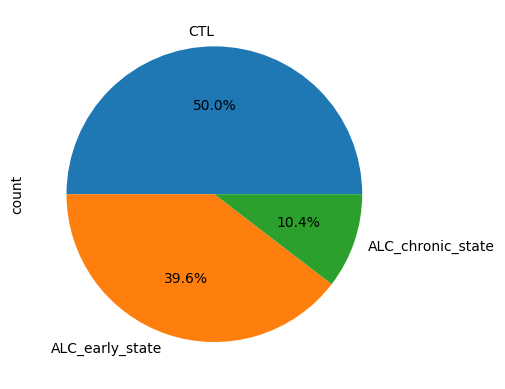

In [7]:
eeg_state['GROUP'].value_counts().plot(kind='pie', autopct='%1.1f%%')
